In [13]:
import os
import pandas as pd

# 📁 현재 디렉토리 기준 (필요시 수정)
input_dir = "../output/transfer"       # 파일들이 있는 폴더 경로
output_file = "../output/transfer/merged.csv"  # 합친 파일 이름

# 모든 CSV 파일 탐색
files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# 빈 데이터프레임 생성
merged_df = pd.DataFrame()

for file in files:
    file_path = os.path.join(input_dir, file)
    # 각 파일 읽기 (첫 줄이 열 이름이므로 header=0)
    df = pd.read_csv(file_path, header=0)

    # 열 이름 자동 추출 (예: 'IN[16]')
    col_name = df.columns[0]

    # 병합: index 기준으로 join
    merged_df[col_name] = df[col_name]

# 결과 저장
merged_df.to_csv(output_file, index=False)
print(f"✅ 병합 완료! 결과: {output_file}")


✅ 병합 완료! 결과: ../output/transfer/merged.csv


✅ 그래프 저장 완료: ../output/transfer/merged_stats.png


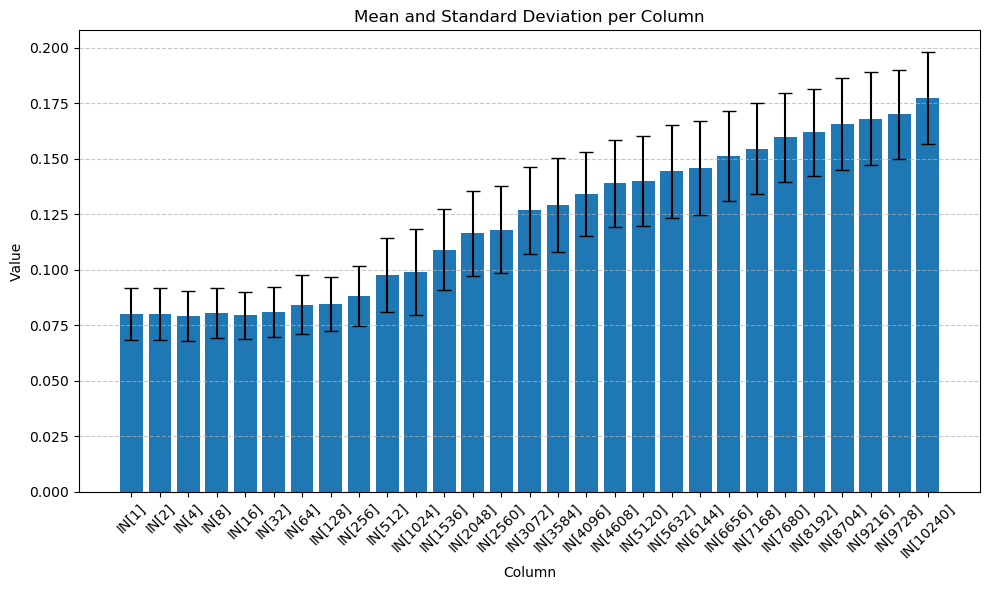

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# 입력 및 출력 경로 설정
input_file = "../output/transfer/merged.csv"
output_file = "../output/transfer/merged_stats.png"

# CSV 읽기
df = pd.read_csv(input_file)

# 🔢 열 이름 안 숫자 추출 함수
def extract_num(col_name):
    match = re.search(r"\[(\d+)\]", col_name)
    return int(match.group(1)) if match else float("inf")

# 🔁 숫자 기준 오름차순으로 열 정렬
sorted_cols = sorted(df.columns, key=extract_num)
df = df[sorted_cols]

# 📈 평균 및 표준편차 계산
means = df.mean()
stds = df.std()

# 라벨 (예: IN[16], IN[32], ...)
labels = df.columns

# 🎨 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대그래프 (평균 + 표준편차)
plt.bar(labels, means, yerr=stds, capsize=5)

# 제목 및 축 레이블
plt.title("Mean and Standard Deviation per Column")
plt.xlabel("Column")
plt.ylabel("Value")

# 그래프 꾸미기
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 이미지 저장
plt.tight_layout()
plt.savefig(output_file)
print(f"✅ 그래프 저장 완료: {output_file}")

plt.show()

✅ 그래프 저장 완료: ../output/transfer/merged_stats.png


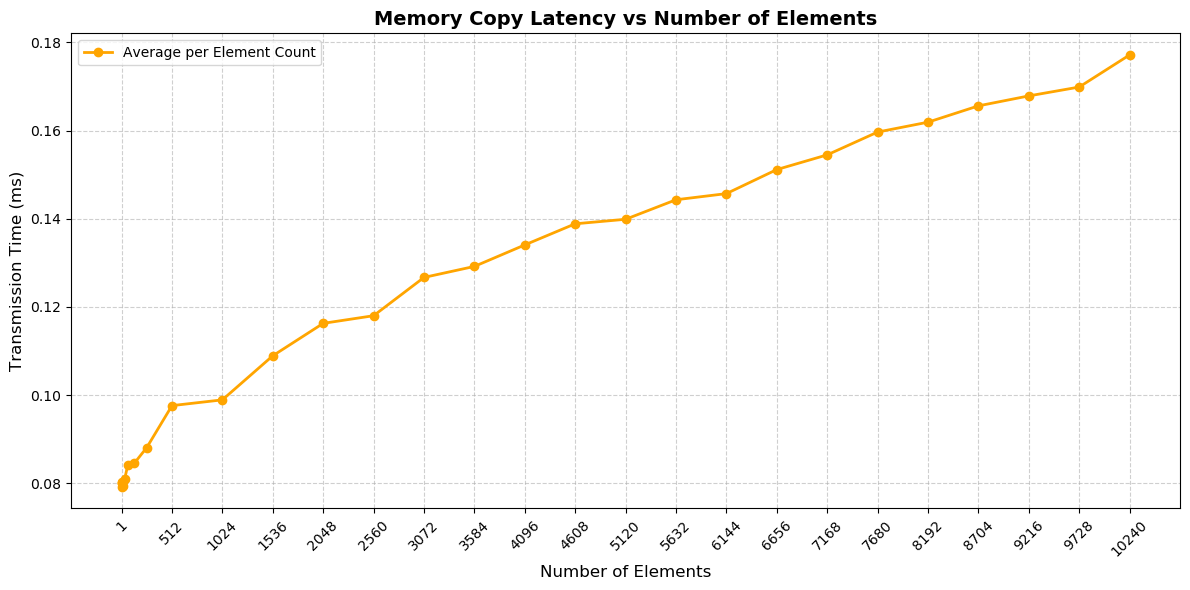

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# 입력 및 출력 경로 설정
input_file = "../output/transfer/merged.csv"
output_file = "../output/transfer/merged_stats.png"

# CSV 읽기
df = pd.read_csv(input_file)

# 🔢 열 이름에서 숫자 추출 함수
def extract_num(col_name):
    match = re.search(r"\[(\d+)\]", col_name)
    return int(match.group(1)) if match else float("inf")

# 🔁 숫자 기준 오름차순으로 열 정렬
sorted_cols = sorted(df.columns, key=extract_num)
df = df[sorted_cols]

# 📈 평균 및 표준편차 계산
means = df.mean()
stds = df.std()
labels = df.columns

# 숫자 라벨 (x축용)
x = [extract_num(c) for c in labels]

# 🎨 그래프 스타일
plt.figure(figsize=(12, 6))
plt.plot(x, means, marker='o', color='orange', linewidth=2, label="Average per Element Count")
# plt.fill_between(x, means - stds, means + stds, color='orange', alpha=0.2, label="±1 Std Dev")

# 제목 및 축 레이블
plt.title("Memory Copy Latency vs Number of Elements", fontsize=14, weight='bold')
plt.xlabel("Number of Elements", fontsize=12)
plt.ylabel("Transmission Time (ms)", fontsize=12)

# 축 및 눈금
plt.xticks(x, x, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
xtick_values = [v for v in x if v < 2 or v > 256]
plt.xticks(xtick_values, xtick_values, rotation=45)

# 범례
plt.legend(loc="upper left", frameon=True)

# 레이아웃 및 저장
plt.tight_layout()
plt.savefig(output_file)
print(f"✅ 그래프 저장 완료: {output_file}")

# (선택) 평균/표준편차 CSV 저장
stats_df = pd.DataFrame({"mean": means, "std": stds})
stats_df.to_csv("../output/transfer/merged_stats.csv", index_label="Column")


✅ 그래프 저장 완료: ../output/transfer/merged_stats.png


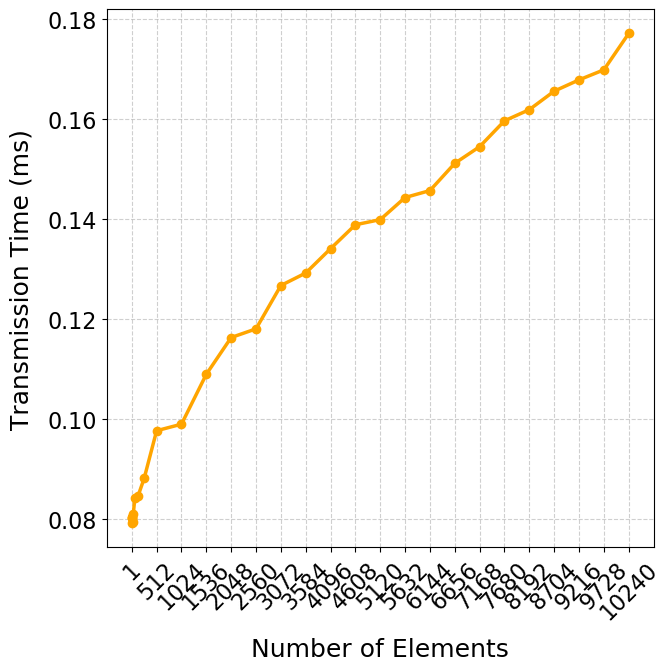

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# 입력 및 출력 경로 설정
input_file = "../output/transfer/merged.csv"
output_file = "../output/transfer/merged_stats.png"

# CSV 읽기
df = pd.read_csv(input_file)

# 🔢 열 이름에서 숫자 추출 함수
def extract_num(col_name):
    match = re.search(r"\[(\d+)\]", col_name)
    return int(match.group(1)) if match else float("inf")

# 🔁 숫자 기준 오름차순으로 열 정렬
sorted_cols = sorted(df.columns, key=extract_num)
df = df[sorted_cols]

# 📈 평균 및 표준편차 계산
means = df.mean()
stds = df.std()
labels = df.columns

# 숫자 라벨 (x축용)
x = [extract_num(c) for c in labels]

# 🎨 전체 폰트 크기 확대
plt.rcParams.update({
    'font.size': 16,          # 전체 기본 폰트 크기
    'axes.titlesize': 20,     # 그래프 제목
    'axes.labelsize': 18,     # 축 라벨
    'xtick.labelsize': 16,    # x축 눈금
    'ytick.labelsize': 16,    # y축 눈금
    'legend.fontsize': 16,    # 범례
})

# 🎨 그래프 스타일
plt.figure(figsize=(7, 7))
plt.plot(x, means, marker='o', color='orange', linewidth=2.5, label="Average per Element Count")

# 제목 및 축 레이블
# plt.title("Memory Copy Latency vs Number of Elements", weight='bold', pad=15)
plt.xlabel("Number of Elements", labelpad=10)
plt.ylabel("Transmission Time (ms)", labelpad=10)

# ✅ x축 라벨 중 2~256은 숨김
xtick_values = [v for v in x if v < 2 or v > 256]
plt.xticks(xtick_values, xtick_values, rotation=45)


# 격자 및 범례
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(loc="upper left", frameon=True)

# 레이아웃 및 저장
plt.tight_layout()
plt.savefig(output_file, dpi=300)
print(f"✅ 그래프 저장 완료: {output_file}")

# 📁 평균/표준편차 CSV 저장
stats_df = pd.DataFrame({"mean": means, "std": stds})
stats_df.to_csv("../output/transfer/merged_stats.csv", index_label="Column")


✅ 그래프 저장 완료: ../output/transfer/merged_stats.png


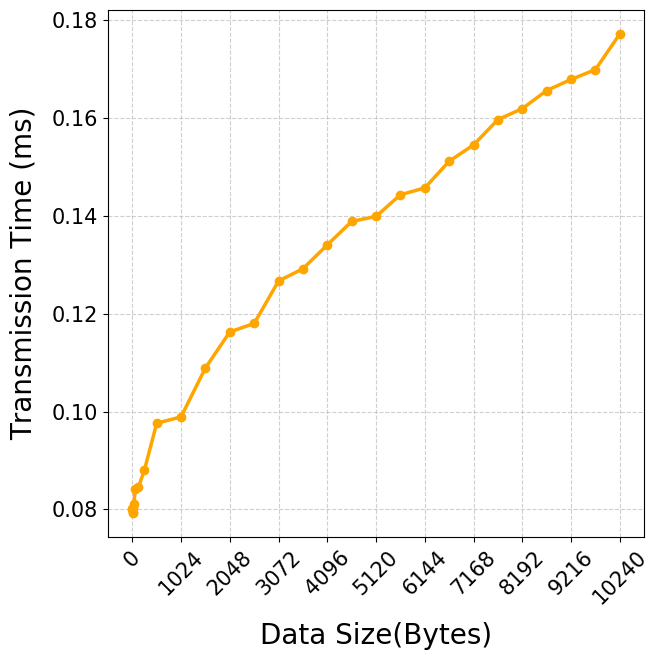

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

# 입력 및 출력 경로 설정
input_file = "../output/transfer/merged.csv"
output_file = "../output/transfer/merged_stats.png"

# CSV 읽기
df = pd.read_csv(input_file)

# 🔢 열 이름에서 숫자 추출 함수
def extract_num(col_name):
    match = re.search(r"\[(\d+)\]", col_name)
    return int(match.group(1)) if match else float("inf")

# 🔁 숫자 기준 오름차순으로 열 정렬
sorted_cols = sorted(df.columns, key=extract_num)
df = df[sorted_cols]

# 📈 평균 및 표준편차 계산
means = df.mean()
stds = df.std()
labels = df.columns

# 숫자 라벨 (x축용)
x = [extract_num(c) for c in labels]

# 🎨 전체 폰트 크기 확대
plt.rcParams.update({
    'font.size': 20,          # 기본 폰트 크기
    'axes.titlesize': 24,     # 제목 크기
    'axes.labelsize': 20,     # 축 라벨 크기
    'xtick.labelsize': 15,    # X축 눈금
    'ytick.labelsize': 15,    # Y축 눈금
    'legend.fontsize': 18,    # 범례
})
# 🎨 그래프 스타일
plt.figure(figsize=(7, 7))
plt.plot(x, means, marker='o', color='orange', linewidth=2.5, label="Average per Element Count")

# 축 레이블
plt.xlabel("Data Size(Bytes)", labelpad=10)
plt.ylabel("Transmission Time (ms)", labelpad=10)

# ✅ x축 눈금: 0부터 최대값까지 1024 단위로 설정
max_x = max(x)
xtick_values = list(range(0, int(max_x) + 1024, 1024))
plt.xticks(xtick_values, xtick_values, rotation=45)

# 격자 및 범례
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(loc="upper left", frameon=True)

# 레이아웃 및 저장
plt.tight_layout()
plt.savefig(output_file, dpi=300)
print(f"✅ 그래프 저장 완료: {output_file}")

# 📁 평균/표준편차 CSV 저장
stats_df = pd.DataFrame({"mean": means, "std": stds})
stats_df.to_csv("../output/transfer/merged_stats.csv", index_label="Column")
